<a href="https://colab.research.google.com/github/weibb123/Tensorflow_Tutorial/blob/main/tf_2(clasification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


#Import toy classification dataset from sklearn

In [ ]:
from sklearn.datasets import make_circles

#make 1000 examples
n = 1000

#Create circle
X, y = make_circles(n, noise=0.03, random_state=42)

In [ ]:
# see features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
# see the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

In [ ]:
import pandas as pd
df = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
df

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


In [ ]:
# checkout different labels
df.label.value_counts()

1    500
0    500
Name: label, dtype: int64

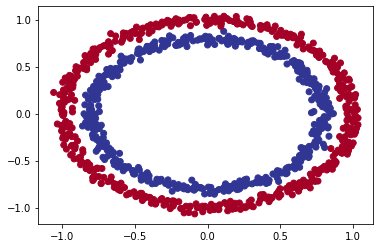

In [ ]:
# Visualization
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
# check the shape of features and target y
print(X.shape, y.shape)

(1000, 2) (1000,)


In [ ]:
# View the first example of feature and target y
print(X[0], y[0])

[0.75424625 0.23148074] 1


we got two features that lead to one y value. \\
this means our neural network needs to accept a input atleast one dimension being atleast two and output tensor atleast one value.

In [ ]:
#Steps to modelling
# Step 1: Create model (layers of neural network)
# Step 2: Compile model(loss,metrics)
# Step 3: Fitting a model(fit model to your data)

tf.random.set_seed(42)

model = tf.keras.Sequential([
                       tf.keras.layers.Dense(100, input_shape=(None, 1)),
                       tf.keras.layers.Dense(10),
                       tf.keras.layers.Dense(1)

])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['accuracy'])

model.fit(X, y, epochs=2)

Epoch 1/2
32/32 [==============================] - 1s 2ms/step - loss: 1.0589 - accuracy: 0.4777
Epoch 2/2
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5140


#Couple Ways to improve the model
1. Adding layers
2. Increase number of hidden units
3. Change activation functions
4. Change optimization functions
5. Change learning rate
6. Fit on more data
7. Fit longer


In [ ]:
#Lets write a function that plot decision boundary
import numpy as np

def plot_boundary(model, X, y):
  """take in a neural net model and fit on X,y to see 
  pattern and plot decision boundary
  reference + credit
  1. CS231n - https://cs231n.github.io/neural-networks-case-study/"""

 # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

doing multiclass classification...


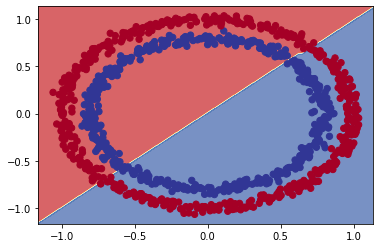

In [ ]:
plot_boundary(model, X, y)

In [ ]:
# Recall that the data is circle, we need our neural network to learn non-linearity in data!
# correct way to do classification

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                       tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                       tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
                       tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) #for binary-class sigmoid is real-deal
])

model_2.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

model_2.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 2ms/step - loss: 0.6891 - accuracy: 0.5020
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.5170
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6824 - accuracy: 0.5160
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6813 - accuracy: 0.5300
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5390
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6794 - accuracy: 0.5380
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6785 - accuracy: 0.5500
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6778 - accuracy: 0.5480
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6772 - accuracy: 0.5530
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5510
Epoch 11/

doing binary classifcation...


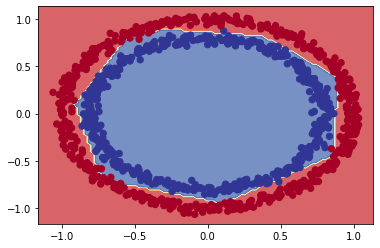

In [ ]:
plot_boundary(model_2, X, y)

#Redo classifcation problem again

In [ ]:
len(X)

1000

In [ ]:
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
                       tf.keras.layers.Dense(4, activation = 'relu'),
                       tf.keras.layers.Dense(4, activation = 'relu'),
                       tf.keras.layers.Dense(1, activation = 'sigmoid') #for binary-class sigmoid is real-deal
])

model_3.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=['accuracy'])

history = model_3.fit(X, y, epochs=25)


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


32/32 [==============================] - 1s 3ms/step - loss: 0.6834 - accuracy: 0.5550
Epoch 2/25
32/32 [==============================] - 0s 3ms/step - loss: 0.6761 - accuracy: 0.5630
Epoch 3/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5600
Epoch 4/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6615 - accuracy: 0.5960
Epoch 5/25
32/32 [==============================] - 0s 4ms/step - loss: 0.6553 - accuracy: 0.5850
Epoch 6/25
32/32 [==============================] - 0s 4ms/step - loss: 0.6386 - accuracy: 0.6360
Epoch 7/25
32/32 [==============================] - 0s 2ms/step - loss: 0.6150 - accuracy: 0.6890
Epoch 8/25
32/32 [==============================] - 0s 2ms/step - loss: 0.5641 - accuracy: 0.7480
Epoch 9/25
32/32 [==============================] - 0s 3ms/step - loss: 0.5101 - accuracy: 0.8090
Epoch 10/25
32/32 [==============================] - 0s 2ms/step - loss: 0.4451 - accuracy: 0.8550
Epoch 11/25
32/32 [===========

In [ ]:
# Evaluate our model on the test set
loss, accuracy = model_3.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {100*accuracy:.2f}%")

7/7 [==============================] - 0s 2ms/step - loss: 0.0963 - accuracy: 0.9900
Model loss on the test set: 0.09631659835577011
Model accuracy on the test set: 99.00%


doing binary classifcation...
doing binary classifcation...


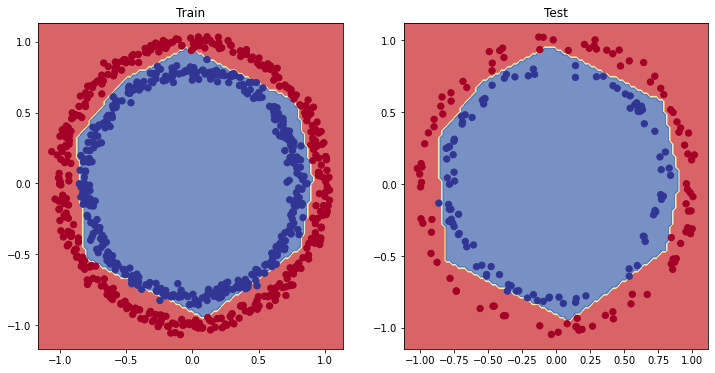

In [ ]:
# Plot the decision boundaries for the training and test sets
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_boundary(model_3, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_boundary(model_3, X=X_test, y=y_test)
plt.show()

In [ ]:
#acess information in history to view loss curves

pd.DataFrame(history.history)

,loss,accuracy
0,0.683428,0.555
1,0.676111,0.563
2,0.669990,0.560
3,0.661518,0.596
4,0.655262,0.585
5,0.638609,0.636
6,0.614991,0.689
7,0.564100,0.748
8,0.510077,0.809
9,0.445113,0.855


Text(0.5, 1.0, 'Model_3 loss curve')

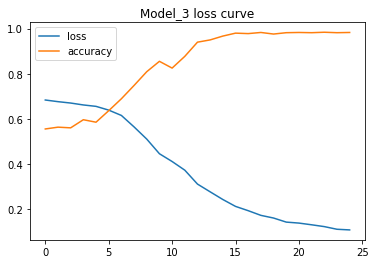

In [ ]:
pd.DataFrame(history.history).plot()
plt.title("Model_3 loss curve")

#Finding the best learning rate

Learning rate callback \\
alows you to find optimal learning rate while training

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy", # we can use strings here too
              optimizer="Adam", # same as tf.keras.optimizers.Adam() with default settings
              metrics=["accuracy"]) 

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # traverse a set of learning rate values starting from 1e-4, increasing by 10**(epoch/20) every epoch

# Fit the model (passing the lr_scheduler callback)
history = model_3.fit(X_train, 
                      y_train, 
                      epochs=100,
                      callbacks=[lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 3ms/step - loss: 0.6945 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6938 - accuracy: 0.4975 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6922 - accuracy: 0.4975 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.6914 - accuracy: 0.5063 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 6ms/step - loss: 0.6906 - accuracy: 0.5013 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 5ms/step - loss: 0.6898 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5038 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

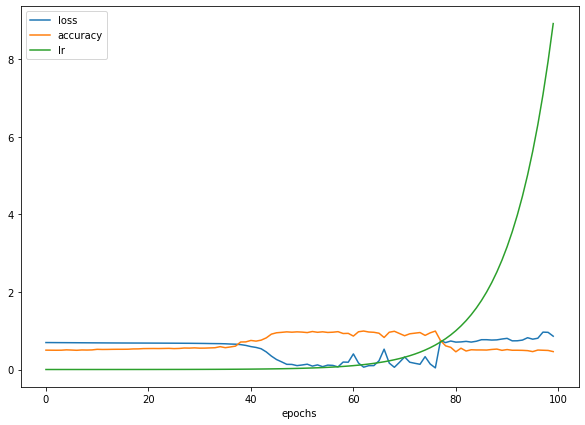

In [ ]:
# Checkout the history
pd.DataFrame(history.history).plot(figsize=(10,7), xlabel="epochs");

As you can see the learning rate exponentially increase as number of epochs increase. \\

you can see model's accuracy goes up at a specific point when learnng rate slowly increase. \\

To find out where this infliction point is, we will use log scale

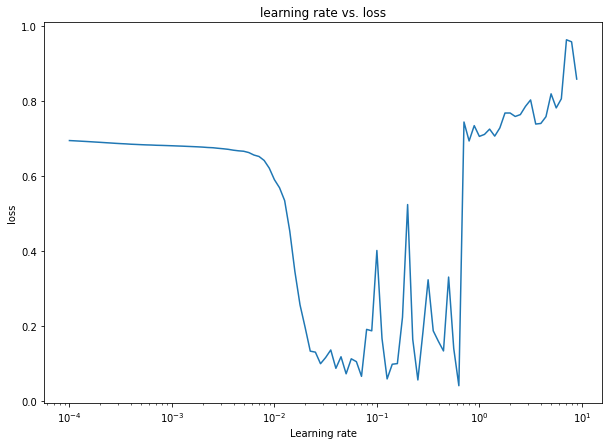

In [47]:
# plot learning rate versus the loss
lrs = 1e-4 * (10 ** (np.arange(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history.history['loss']) # we want x-axis learning rate to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("loss")
plt.title("learning rate vs. loss");

to figure out the ideal value of the learning rate, is somewhere just before the loss curve bottoms out (a value where loss is still decreasing) \\
In this case, ideal learning rate ends up between 0.01 and 0.02